# Ejemplo diagrama de Bode de filtro pasa alto con Amplificador Operacional

Consideremos el siguente circuito basado en amplificador operacional.

![filtro_pasa_alto_OPam.png](images/filtro_pasa_alto_OPam.png)

Realizar el diagrama de Bode de la función de transferencia utilizando las librerías vistas.

## Resolución

Vamos a utilizar las librerias Sympy para calculo simbólico. 

In [1]:
import sympy as sp
from sympy import symbols, Eq, I, pi, re, im, Abs, arg
from sympy.plotting import plot_implicit
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
from sympy.physics.control.control_plots import bode_plot
import numpy as np

Definimos las variables de la función de transferencia. En este caso $R1$, $R2$ y $C1$, como elementos del circuito y $S$, como la variable compleja 

In [2]:
R1, R2, C1, S = sp.symbols('R1 R2 C1 S', real=True)

Luego definimos la función de transferencia $A$

In [3]:
A = -R2/(R1+1/(S*C1))
A

-R2/(R1 + 1/(C1*S))

In [4]:
H = sp.expand(A)
H

-R2/(R1 + 1/(C1*S))

Mediante el uso de la función simplify se puede simplificar la expresión:

In [5]:
H = sp.simplify(A)
H

-C1*R2*S/(C1*R1*S + 1)

Para poder operar utilizar esta expresión como una función de transferencia de un sistema LTI, en neceserio emplear la función $TransferFunction$. Esta función toma como argumento los polinomios del númerador y denominador de la función que queremos representar.

Para obtener esos polinomios podemos hacer uso de la función que nos devuelve el numerador y denominador de las nuestra ecuación $A$:

In [6]:
H.as_numer_denom()

(-C1*R2*S, C1*R1*S + 1)

In [7]:
TF= TransferFunction(H.as_numer_denom()[0], H.as_numer_denom()[1], S)
TF

TransferFunction(-C1*R2*S, C1*R1*S + 1, S)

Mediante la función $xreplace$ podemos asignar valores a las variables de la función de transferencia:

In [8]:
TF1=TF.xreplace({C1: 1.0e-6, R1: 2000, R2: 100000})

In [9]:
TF1

TransferFunction(-0.1*S, 0.002*S + 1, S)

In [10]:
sp.nsimplify(TF1)

TransferFunction(-S/10, S/500 + 1, S)

### Gráfica de polos y ceros de la función de transferencia

Mediante la función $pole_zero_plot$ podemos graficar la ubicación de los polos y ceros del función de transfencia en el plano complejo:

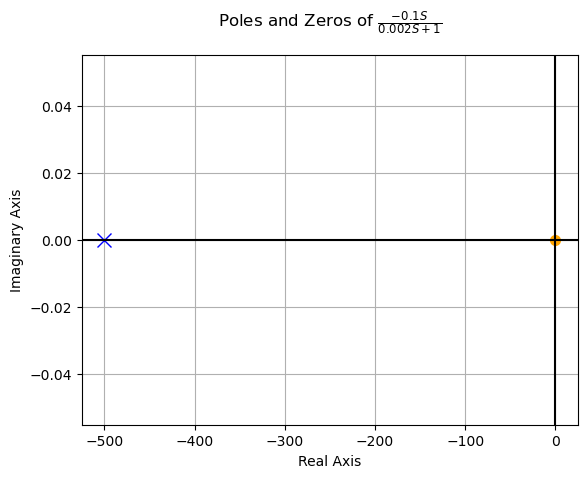

In [11]:
pole_zero_plot(TF1)

### Gráfica del diagrama de Bode de la función de transferencia

Mediante la función $bode_plot$ podemos obtener las gráficas de Bode de la función de transferencia:

<IPython.core.display.Javascript object>


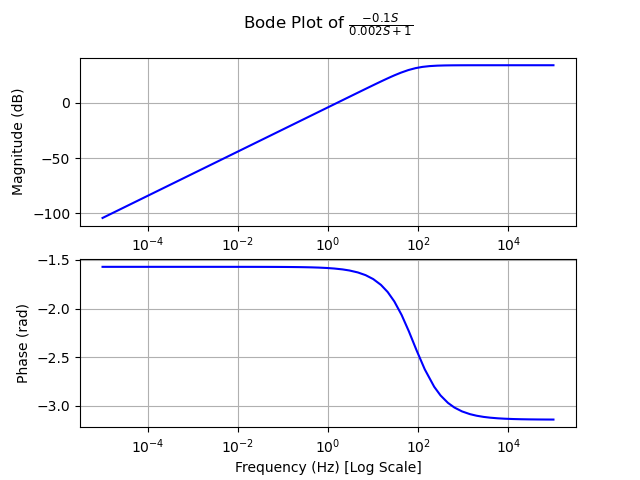

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook

bode_plot(TF1, freq_unit = 'Hz' )

In [13]:
Hv=H.xreplace({C1: 1.0e-6, R1: 2000, R2: 100000, S:2*pi*5*I})
Hv

-1.0*I*pi/(1 + 0.02*I*pi)

In [14]:
arg(Hv).evalf()

-1.63354569176422

In [15]:
(arg(Hv)*180/pi).evalf()

-93.5952737798682

In [16]:
Abs(Hv).evalf()

3.13540969923688

In [17]:
(20*sp.log(Abs(Hv))).evalf()

22.8551970221655

## Gráfica del diagrama polar de la función de tranferencia

Para este caso vamos a utilizar la librería scipy 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [19]:
numerador = TF1.num
numerador

-0.1*S

In [20]:
coeficientesNume=sp.Poly(numerador).all_coeffs()
#numerador = 1

In [21]:
denominador = TF1.den
denominador

0.002*S + 1

In [22]:
coeficientesDen=sp.Poly(denominador).all_coeffs()
coeficientesDen

[0.00200000000000000, 1.00000000000000]

In [23]:
denominador = [float(x) for x in coeficientesDen]
numerador = [float(x) for x in coeficientesNume]

In [24]:
sys =signal.TransferFunction(numerador, denominador)

In [25]:
w, h = signal.freqresp(sys)

### Graficar en el plano complejo

<IPython.core.display.Javascript object>


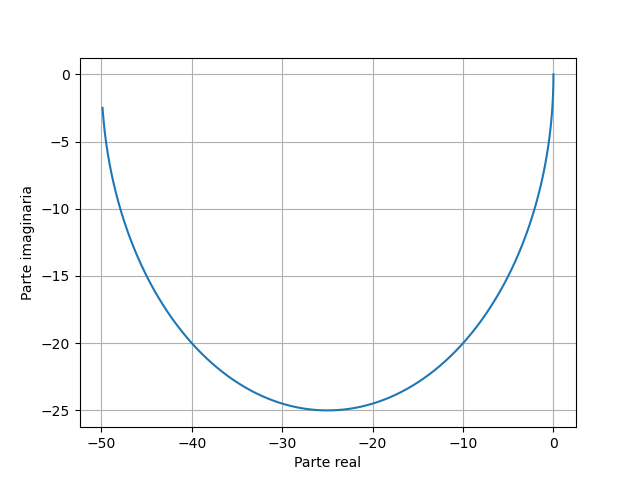

In [26]:
fig, ax = plt.subplots()
ax.plot(h.real, h.imag)
ax.set_xlabel('Parte real')
ax.set_ylabel('Parte imaginaria')
ax.grid(True)

plt.show()

También podemos realizar el diagrama de Bode con scipy

In [27]:
w, mag, phase = signal.bode(sys)

<IPython.core.display.Javascript object>


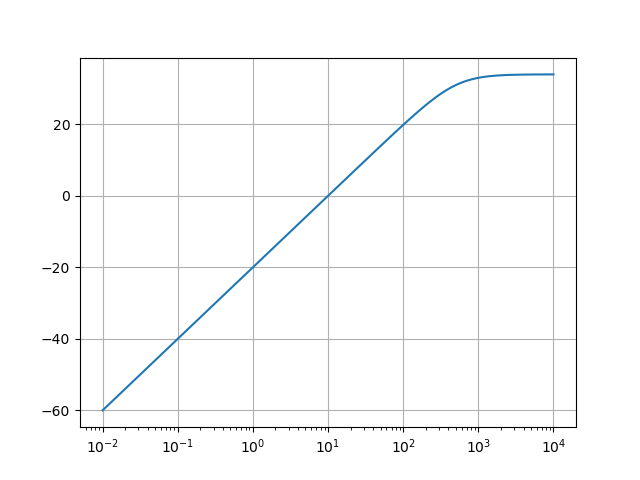

<IPython.core.display.Javascript object>


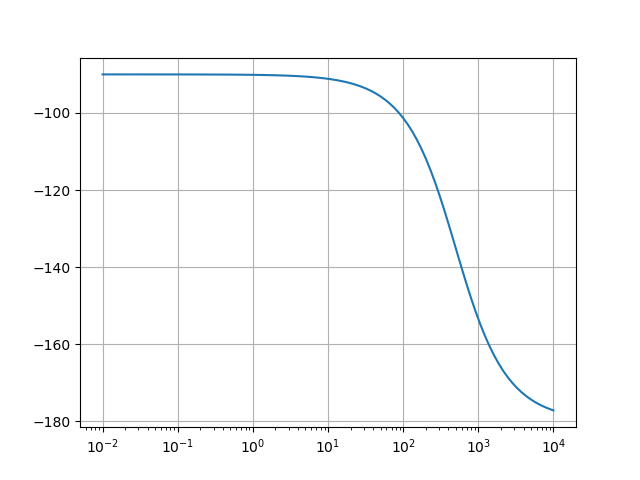

In [28]:
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.grid(True)
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.grid(True)
plt.show()
